## Célula 1: Configuração e Carga

In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando os dados
df = pl.read_parquet("../data/raw/base_treinamento.parquet")

# Configuração visual do Seaborn
sns.set_theme(style="whitegrid")

## Célula 2: Verificação de Nulos (Vital para IA)

In [2]:
print(df.null_count())

shape: (1, 13)
┌───────────┬─────────────┬───────┬────────────┬───┬────────────┬────────────┬────────────┬────────┐
│ profissao ┆ tempoprofis ┆ renda ┆ tiporeside ┆ … ┆ nomecomerc ┆ valor_soli ┆ valor_tota ┆ classe │
│ ---       ┆ sao         ┆ ---   ┆ ncia       ┆   ┆ ial        ┆ citado     ┆ l_bem      ┆ ---    │
│ u32       ┆ ---         ┆ u32   ┆ ---        ┆   ┆ ---        ┆ ---        ┆ ---        ┆ u32    │
│           ┆ u32         ┆       ┆ u32        ┆   ┆ u32        ┆ u32        ┆ u32        ┆        │
╞═══════════╪═════════════╪═══════╪════════════╪═══╪════════════╪════════════╪════════════╪════════╡
│ 3         ┆ 0           ┆ 0     ┆ 3          ┆ … ┆ 0          ┆ 0          ┆ 0          ┆ 0      │
└───────────┴─────────────┴───────┴────────────┴───┴────────────┴────────────┴────────────┴────────┘


## Célula 3: Distribuição da Variável Alvo (Target)

shape: (2, 2)
┌────────┬─────┐
│ classe ┆ len │
│ ---    ┆ --- │
│ str    ┆ u32 │
╞════════╪═════╡
│ bom    ┆ 89  │
│ ruim   ┆ 61  │
└────────┴─────┘


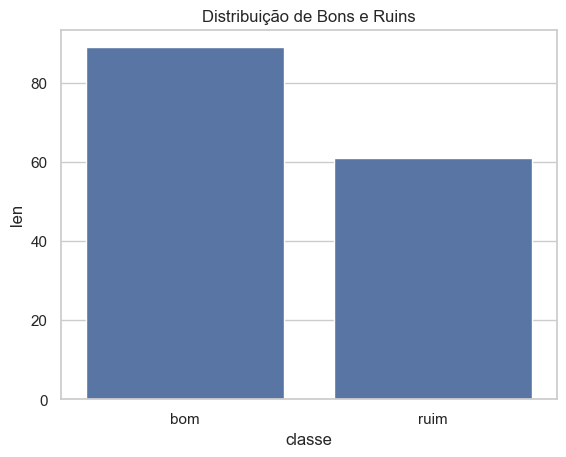

In [3]:
contagem_classe = df.group_by("classe").len() # Usando .len() em vez de .count()
print(contagem_classe)

# Gráfico de barras
sns.barplot(data=contagem_classe.to_pandas(), x="classe", y="len")
plt.title("Distribuição de Bons e Ruins")
plt.show()

## Célula 4: Análise de Renda vs Classe

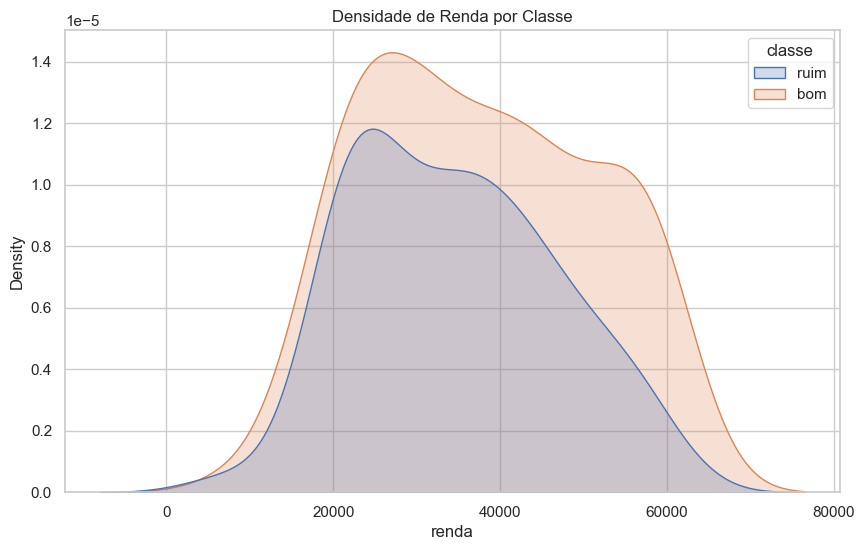

In [4]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df.to_pandas(), x="renda", hue="classe", fill=True)
plt.title("Densidade de Renda por Classe")
plt.show()

## Célula 5: Correlação de Variáveis Numéricas

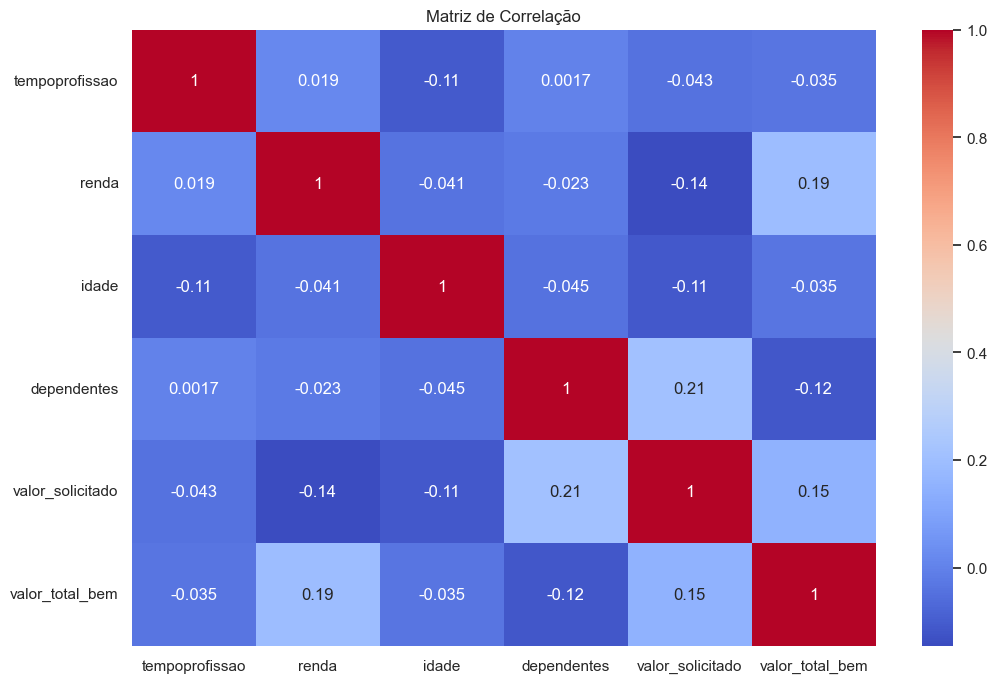

In [5]:
# Selecionamos apenas números
numericos = df.select(pl.col(pl.Float64, pl.Int32))

plt.figure(figsize=(12,8))
sns.heatmap(numericos.to_pandas().corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

## Célula 6: Histograma (Distribuição de Idade)

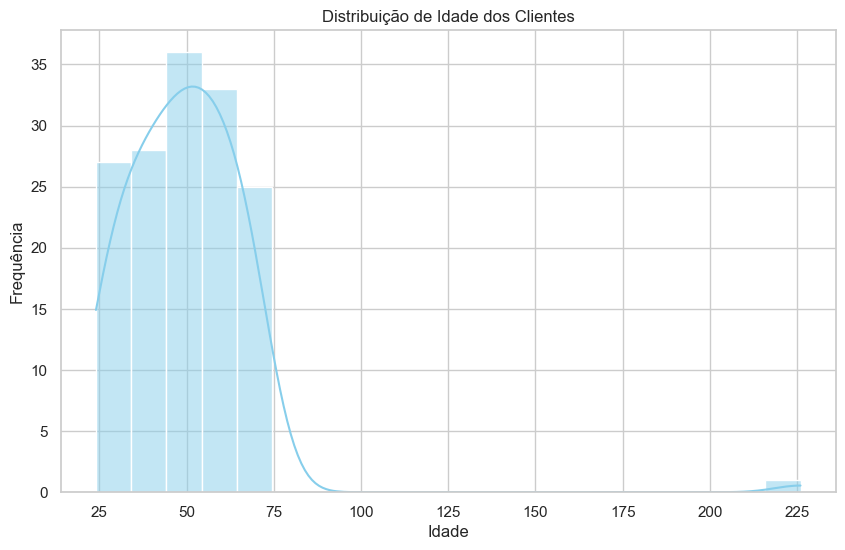

In [8]:
plt.figure(figsize=(10, 6))
# Usando o Seaborn para criar o histograma com a linha de densidade (kde)
sns.histplot(data=df.to_pandas(), x="idade", kde=True, bins=20, color="skyblue")
plt.title("Distribuição de Idade dos Clientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

## Célula 7: Boxplot (Renda vs Classe)

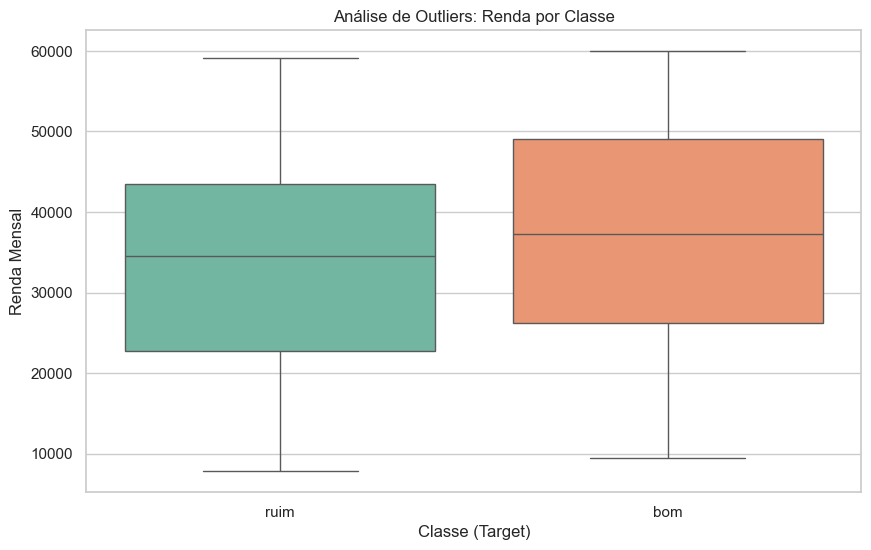

In [11]:
plt.figure(figsize=(10, 6))
# O Boxplot brilha ao comparar categorias
sns.boxplot(data=df.to_pandas(), x="classe", y="renda", palette="Set2", hue="classe")
plt.title("Análise de Outliers: Renda por Classe")
plt.xlabel("Classe (Target)")
plt.ylabel("Renda Mensal")
plt.show()

## Resumo das Estatística do Dataset

In [7]:
df.describe()

statistic,profissao,tempoprofissao,renda,tiporesidencia,escolaridade,score,idade,dependentes,estadocivil,nomecomercial,valor_solicitado,valor_total_bem,classe
str,str,f64,f64,str,str,str,f64,f64,str,str,f64,f64,str
"""count""","""147""",150.0,150.0,"""147""","""150""","""150""",150.0,150.0,"""150""","""150""",150.0,150.0,"""150"""
"""null_count""","""3""",0.0,0.0,"""3""","""0""","""0""",0.0,0.0,"""0""","""0""",0.0,0.0,"""0"""
"""mean""",null,6690.573333,36406.813333,null,null,null,49.66,0.98,null,null,1.4451268e7,3.7516e7,null
"""std""",null,81647.612861,12974.282533,null,null,null,20.022078,0.993063,null,null,1.1391e7,1.7893e7,null
"""min""","""Adv.""",0.0,7814.0,"""Alugada""","""Ens.Fundamental""","""Baixo""",24.0,0.0,"""Casado""","""AgileXplorer""",2.829e6,3.117e6,"""bom"""
"""25%""",null,13.0,23943.0,null,null,null,38.0,0.0,null,null,6.9172e6,2.8e7,null
"""50%""",null,24.0,35795.0,null,null,null,49.0,1.0,null,null,1.23258e7,3.2e7,null
"""75%""",null,33.0,46531.0,null,null,null,60.0,2.0,null,null,1.7152e7,4e7,null
"""max""","""Programador""",9.99999e5,59976.0,"""Própria""","""Superior""","""MuitoBom""",226.0,4.0,"""Víuvo""","""WorkMaster""",8e7,8e7,"""ruim"""
